In [82]:
# Initialization: import libraries and dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

result_data = pd.read_csv('datasets/schools_modified.csv')

print(result_data.head())

                                         school_name    borough building_code  \
0  New Explorations into Science, Technology and ...  Manhattan          M022   
1                               Essex Street Academy  Manhattan          M445   
2                       Lower Manhattan Arts Academy  Manhattan          M445   
3    High School for Dual Language and Asian Studies  Manhattan          M445   
4      Henry Street School for International Studies  Manhattan          M056   

   average_math  average_reading  average_writing  percent_tested  
0           657              601              601             NaN  
1           395              411              387            78.9  
2           418              428              415            65.1  
3           613              453              463            95.9  
4           410              406              381            59.7  


In [83]:
# NYC schools with the best math results

best_math = 0.8 * 800
best_math_school = result_data[result_data['average_math'] >= best_math][['school_name','average_math']].sort_values('average_math', ascending=False)
print(best_math_school)


                                           school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island Technical High School           711
365  Queens High School for the Sciences at York Co...           701
68   High School for Mathematics, Science, and Engi...           683
280                     Brooklyn Technical High School           682
333                        Townsend Harris High School           680
174  High School of American Studies at Lehman College           669
0    New Explorations into Science, Technology and ...           657
45                       Eleanor Roosevelt High School           641


In [84]:
# Top 10 performing schools based on combined SAT

result_data['total_SAT'] = result_data['average_math'] + result_data['average_reading'] + result_data['average_writing']
top_10_schools = result_data[['school_name','total_SAT']].sort_values('total_SAT', ascending=False).head(10)
print(top_10_schools)

                                           school_name  total_SAT
88                              Stuyvesant High School       2144
170                       Bronx High School of Science       2041
93                 Staten Island Technical High School       2041
174  High School of American Studies at Lehman College       2013
333                        Townsend Harris High School       1981
365  Queens High School for the Sciences at York Co...       1947
5                       Bard High School Early College       1914
280                     Brooklyn Technical High School       1896
45                       Eleanor Roosevelt High School       1889
68   High School for Mathematics, Science, and Engi...       1889


In [85]:
# Borough with the largest standard deviation in the combined SAT

largest = result_data.groupby('borough', as_index=False)['total_SAT'].agg(['count', 'mean', 'std']).round(2)
largest_std_dev = largest[largest['std'] == largest['std'].max()]
largest_std_dev = largest_std_dev.rename(columns={'count':'num_schools', 'mean':'average_SAT', 'std':'std_SAT'})

print(largest_std_dev)

     borough  num_schools  average_SAT  std_SAT
2  Manhattan           89      1340.13   230.29


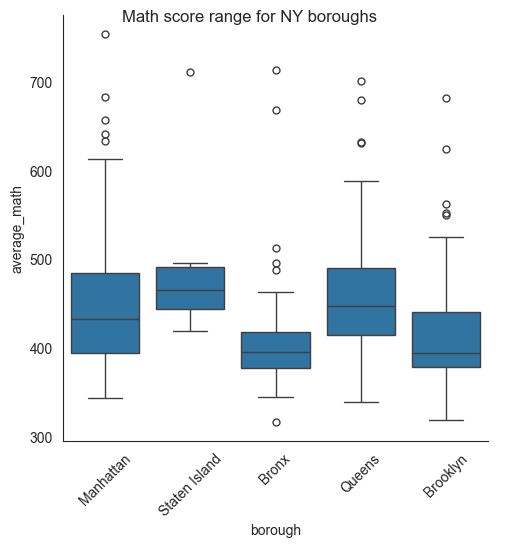

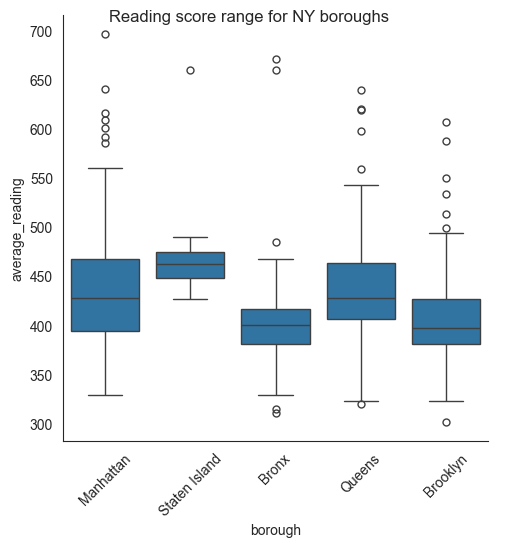

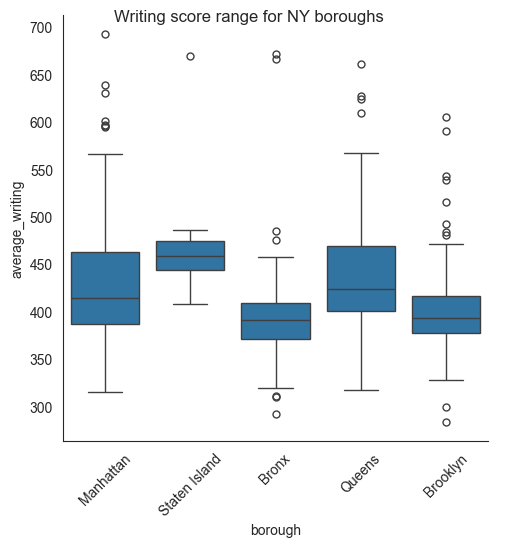

In [86]:
# Visualizing the score range for each borough
sns.color_palette('rocket')
sns.set_style('white')

math_viz = sns.catplot(data=result_data, kind='box', x='borough', y='average_math')
plt.xticks(rotation=45)
math_viz.fig.suptitle('Math score range for NY boroughs')

reading_viz = sns.catplot(data=result_data, kind='box', x='borough', y='average_reading')
plt.xticks(rotation=45)
reading_viz.fig.suptitle('Reading score range for NY boroughs')

writing_viz = sns.catplot(data=result_data, kind='box', x='borough', y='average_writing')
plt.xticks(rotation=45)
writing_viz.fig.suptitle('Writing score range for NY boroughs')

plt.show()

